In [ ]:
import pandas as pd
df=pd.read_csv("/content/sleep_health_lifestyle_with_issues.csv")
df2=pd.read_csv("/content/new.csv")#has no instead of none and splited

# **Data Engineering **

In [ ]:
df.head()




,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder
0,1,Male,29,Manual Labor,7.4,7.0,41,7,Obese,124/70,91,8539.0,NaN
1,2,Female,43,Retired,4.2,4.9,41,5,Obese,131/86,81,18754.0,NaN
2,3,Male,44,Retired,6.1,6.0,107,4,Underweight,122/70,81,2857.0,NaN
3,4,Male,29,Office Worker,8.3,10.0,20,10,Obese,124/72,55,6886.0,NaN
4,5,Male,67,Retired,9.1,9.5,19,4,Overweight,133/78,97,14945.0,Insomnia


In [ ]:
df2.shape[0]

405

In [ ]:
# Step 1: Split the Blood Pressure column into systolic and diastolic
df[['Systolic', 'Diastolic']] = df['Blood Pressure (systolic/diastolic)'] \
    .str.split('/', expand=True)

# Step 2: Convert split columns to numeric types
df['Systolic'] = pd.to_numeric(df['Systolic'], errors='coerce')
df['Diastolic'] = pd.to_numeric(df['Diastolic'], errors='coerce')

# Step 3: Calculate derived metric - Pulse Pressure
df['Pulse Pressure'] = df['Systolic'] - df['Diastolic']

# Step 4: Optional - Categorize blood pressure
def categorize_bp(row):
    if pd.isnull(row['Systolic']) or pd.isnull(row['Diastolic']):
        return 'Unknown'
    elif row['Systolic'] < 90 or row['Diastolic'] < 60:
        return 'Hypotension'
    elif row['Systolic'] <= 120 and row['Diastolic'] <= 80:
        return 'Normal'
    elif row['Systolic'] <= 139 or row['Diastolic'] <= 89:
        return 'Elevated'
    else:
        return 'Hypertension'

df['BP Category'] = df.apply(categorize_bp, axis=1)
#save
df1=df.to_csv('new_splited_sleepdata.csv', index=False)

In [ ]:
df1_after_split=pd.read_csv("/content/new_splited_sleepdata.csv")

In [ ]:
missing =pd.read_csv("/content/new.csv").isnull().sum()
print(missing)

Person ID                                 0
Gender                                    0
Age                                       0
Occupation                                0
Sleep Duration (hours)                   25
Quality of Sleep (scale: 1-10)           20
Physical Activity Level (minutes/day)     0
Stress Level (scale: 1-10)                0
BMI Category                              0
Blood Pressure (systolic/diastolic)       0
Heart Rate (bpm)                          0
Daily Steps                              20
Sleep Disorder                            0
Systolic                                  0
Diastolic                                 0
Pulse Pressure                            0
BP Category                               0
dtype: int64


In [ ]:
#Detect duplicated rows.
s=df2.duplicated().sum()
s



5

In [ ]:
# Remove complete duplicate rows
df2.drop_duplicates()


,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder
0,1,Male,29,Manual Labor,7.4,7.0,41,7,Obese,124/70,91,8539.0,NaN
1,2,Female,43,Retired,4.2,4.9,41,5,Obese,131/86,81,18754.0,NaN
2,3,Male,44,Retired,6.1,6.0,107,4,Underweight,122/70,81,2857.0,NaN
3,4,Male,29,Office Worker,8.3,10.0,20,10,Obese,124/72,55,6886.0,NaN
4,5,Male,67,Retired,9.1,9.5,19,4,Overweight,133/78,97,14945.0,Insomnia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,Female,36,Student,4.5,7.9,73,7,Normal,118/66,64,14497.0,Sleep Apnea
396,397,Female,45,Manual Labor,6.0,6.1,72,8,Obese,132/80,65,12848.0,Insomnia
397,398,Female,30,Student,5.3,6.5,58,10,Obese,125/76,66,15255.0,Insomnia
398,399,Female,41,Retired,11.0,9.1,73,9,Obese,130/75,75,6567.0,Sleep Apnea


In [ ]:
df2.reset_index(drop=True)



,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder
0,1,Male,29,Manual Labor,7.4,7.0,41,7,Obese,124/70,91,8539.0,NaN
1,2,Female,43,Retired,4.2,4.9,41,5,Obese,131/86,81,18754.0,NaN
2,3,Male,44,Retired,6.1,6.0,107,4,Underweight,122/70,81,2857.0,NaN
3,4,Male,29,Office Worker,8.3,10.0,20,10,Obese,124/72,55,6886.0,NaN
4,5,Male,67,Retired,9.1,9.5,19,4,Overweight,133/78,97,14945.0,Insomnia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,210,Male,62,Student,NaN,10.0,26,9,Overweight,131/78,85,12335.0,NaN
401,281,Female,35,Manual Labor,NaN,4.7,115,3,Overweight,117/69,65,19082.0,Insomnia
402,34,Female,50,Office Worker,NaN,6.5,30,5,Obese,135/86,98,18034.0,NaN
403,211,Male,38,Office Worker,NaN,4.9,79,6,Overweight,119/69,83,12692.0,NaN


In [ ]:
df2.describe()

,Person ID,Age,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),Heart Rate (bpm),Daily Steps,Systolic,Diastolic,Pulse Pressure
count,405.000000,405.000000,380.000000,385.000000,405.000000,405.000000,405.000000,385.000000,405.000000,405.000000,405.000000
mean,200.074074,39.997531,8.051053,6.145974,64.829630,5.466667,76.059259,13346.459740,122.209877,73.054321,49.155556
std,115.387549,14.009279,2.385206,1.960028,32.413527,2.805052,15.066074,16850.418139,8.233468,8.964562,4.538395
min,1.000000,18.000000,4.100000,1.000000,10.000000,1.000000,50.000000,2067.000000,109.000000,60.000000,36.000000
25%,100.000000,29.000000,5.900000,4.800000,35.000000,3.000000,64.000000,6567.000000,115.000000,66.000000,46.000000
50%,201.000000,40.000000,8.250000,6.200000,65.000000,5.000000,77.000000,12066.000000,122.000000,73.000000,49.000000
75%,299.000000,49.000000,10.200000,7.500000,94.000000,8.000000,90.000000,16031.000000,128.000000,79.000000,52.000000
max,400.000000,90.000000,12.000000,10.000000,120.000000,10.000000,100.000000,186910.000000,145.000000,96.000000,65.000000


In [ ]:
#median for the whole data
median_values = numeric_cols = df2.select_dtypes(include=['float64', 'int64']).median()
print(median_values)


Person ID                                  201.00
Age                                         40.00
Sleep Duration (hours)                       8.25
Quality of Sleep (scale: 1-10)               6.20
Physical Activity Level (minutes/day)       65.00
Stress Level (scale: 1-10)                   5.00
Heart Rate (bpm)                            77.00
Daily Steps                              12066.00
Systolic                                   122.00
Diastolic                                   73.00
Pulse Pressure                              49.00
dtype: float64


In [ ]:
#median for the whole data set
mean = numeric_cols = df2.select_dtypes(include=['float64', 'int64']).mean()
print(mean)

Person ID                                  200.074074
Age                                         39.997531
Sleep Duration (hours)                       8.051053
Quality of Sleep (scale: 1-10)               6.145974
Physical Activity Level (minutes/day)       64.829630
Stress Level (scale: 1-10)                   5.466667
Heart Rate (bpm)                            76.059259
Daily Steps                              13346.459740
Systolic                                   122.209877
Diastolic                                   73.054321
Pulse Pressure                              49.155556
dtype: float64


In [ ]:
#calculate mode()[0] for all columns
mode=pd.read_csv("/content/new.csv").mode()
print(mode)
# Example: Find the mode for a specific column
mode_value = df['Daily Steps'].mode()[0]
print(f"The mode of the column is: {mode_value}")


    Person ID  Gender   Age Occupation  Sleep Duration (hours)  \
0        34.0  Female  18.0    Student                    11.0   
1        94.0     NaN   NaN        NaN                     NaN   
2       210.0     NaN   NaN        NaN                     NaN   
3       211.0     NaN   NaN        NaN                     NaN   
4       281.0     NaN   NaN        NaN                     NaN   
5         NaN     NaN   NaN        NaN                     NaN   
6         NaN     NaN   NaN        NaN                     NaN   
7         NaN     NaN   NaN        NaN                     NaN   
8         NaN     NaN   NaN        NaN                     NaN   
9         NaN     NaN   NaN        NaN                     NaN   
10        NaN     NaN   NaN        NaN                     NaN   
11        NaN     NaN   NaN        NaN                     NaN   

    Quality of Sleep (scale: 1-10)  Physical Activity Level (minutes/day)  \
0                             10.0                              

In [ ]:
df2.head()

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder,Systolic,Diastolic,Pulse Pressure,BP Category
0,1,Male,29,Manual Labor,9.6,5.6,41,7,Obese,124/70,91,8539.0,No,124,70,54,Elevated
1,2,Female,43,Retired,6.1,5.4,41,5,Obese,131/86,81,18754.0,No,131,86,45,Elevated
2,3,Male,44,Retired,7.8,9.3,107,4,Underweight,122/70,81,2857.0,No,122,70,52,Elevated
3,4,Male,29,Office Worker,11.9,NaN,20,10,Obese,124/72,55,6886.0,No,124,72,52,Elevated
4,5,Male,67,Retired,11.8,7.7,19,4,Overweight,133/78,97,14945.0,Insomnia,133,78,55,Elevated


In [ ]:
#mean for family income
df2['Sleep Duration (hours)'].fillna(df2['Sleep Duration (hours)'].mean(),inplace=True)
df2['Quality of Sleep (scale: 1-10)'].fillna(df2['Quality of Sleep (scale: 1-10)'].mean(),inplace=True)


<ipython-input-53-3283db74d9f4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Sleep Duration (hours)'].fillna(df2['Sleep Duration (hours)'].mean(),inplace=True)
<ipython-input-53-3283db74d9f4>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col]

In [ ]:
#mode for daily steps
df2['Daily Steps'].fillna(df2['Daily Steps'].mode()[0],inplace=True)

<ipython-input-54-ec6019b258ac>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Daily Steps'].fillna(df2['Daily Steps'].mode()[0],inplace=True)


In [ ]:
# Define a function to apply the IQR method and handle outliers
# Apply the IQR method to handle outliers for each column
#df for count
df2_c=pd.read_csv("/content/new.csv")
for column in ['Daily Steps', 'Sleep Duration (hours)', 'Quality of Sleep (scale: 1-10)', 'Heart Rate (bpm)','Physical Activity Level (minutes/day)','Stress Level (scale: 1-10)','Age']:
    # Calculate the IQR
    Q1 = df2[column].quantile(0.25)
    Q3 = df2[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
#count outliers before removing
    outliers_count = ((df2_c[column] < lower_bound) | (df2_c[column] > upper_bound)).sum()
    print(f"Number of outliers before removing {column}: {outliers_count}")
    # Remove outliers
    df2 = df2[(df2[column] >= lower_bound) & (df2[column] <= upper_bound)]
    #count outliers after removing
    #count outliers before removing
    outliers_count = ((df2[column] < lower_bound) | (df2[column] > upper_bound)).sum()
    print(f"Number of outliers after removing in {column}: {outliers_count}")


df2.to_csv('new_ aftermissing_outliar_sleepdata2.csv', index=False)
df2.shape[0]


Number of outliers before removing Daily Steps: 9
Number of outliers after removing in Daily Steps: 0
Number of outliers before removing Sleep Duration (hours): 0
Number of outliers after removing in Sleep Duration (hours): 0
Number of outliers before removing Quality of Sleep (scale: 1-10): 5
Number of outliers after removing in Quality of Sleep (scale: 1-10): 0
Number of outliers before removing Heart Rate (bpm): 0
Number of outliers after removing in Heart Rate (bpm): 0
Number of outliers before removing Physical Activity Level (minutes/day): 0
Number of outliers after removing in Physical Activity Level (minutes/day): 0
Number of outliers before removing Stress Level (scale: 1-10): 0
Number of outliers after removing in Stress Level (scale: 1-10): 0
Number of outliers before removing Age: 3
Number of outliers after removing in Age: 0


389

In [ ]:
df2.shape[0]

335

In [ ]:
df1=pd.read_csv("/content/new_ aftermissing_outliar_sleepdata2.csv")

In [ ]:
from sklearn.preprocessing import LabelEncoder


#all catigorical columns
columns = ['Gender', 'Occupation','BMI Category', 'Sleep Disorder', 'BP Category']

encoder = LabelEncoder()

for col in columns:
    if col in df2.columns:
        df2[col] = encoder.fit_transform(df2[col])
df2.to_csv('sleepdata_encoded.csv', index=False)

In [ ]:
df3=pd.read_csv("/content/sleepdata_encoded.csv")
df3_to_normalize = df3.copy()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


# **Data Analysis **

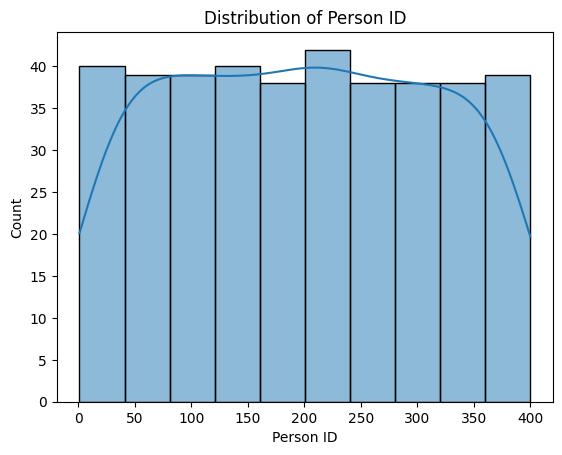

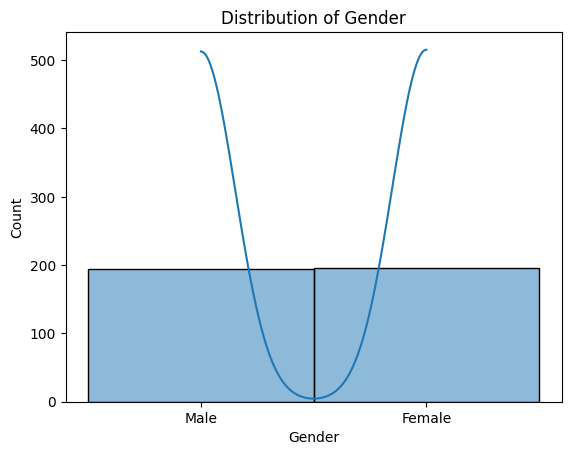

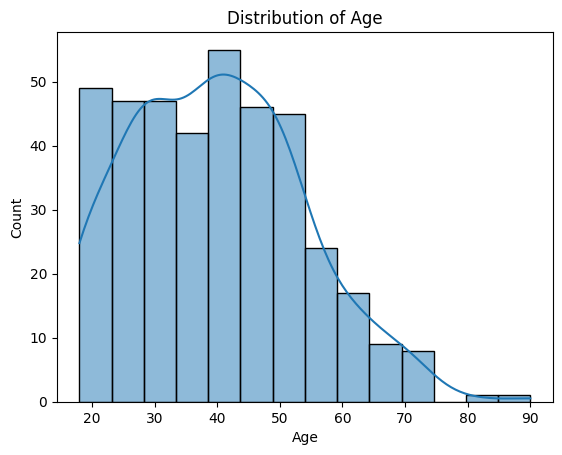

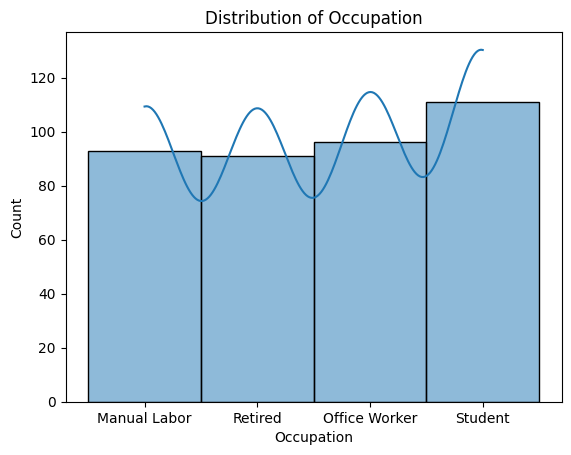

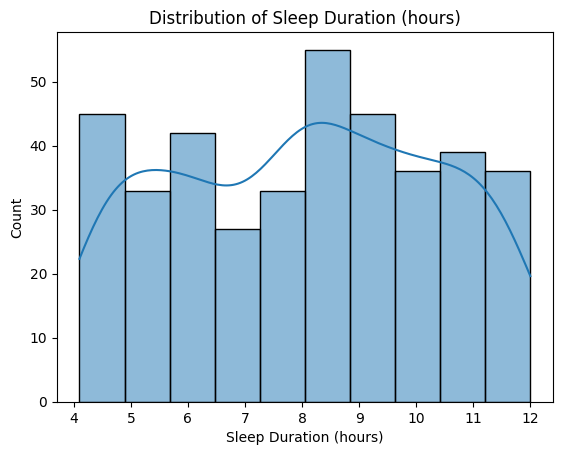

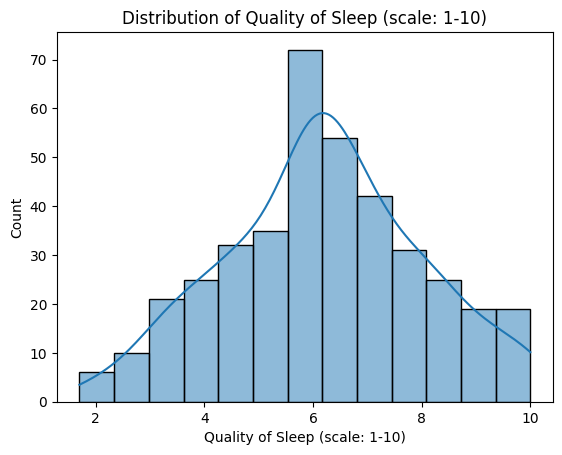

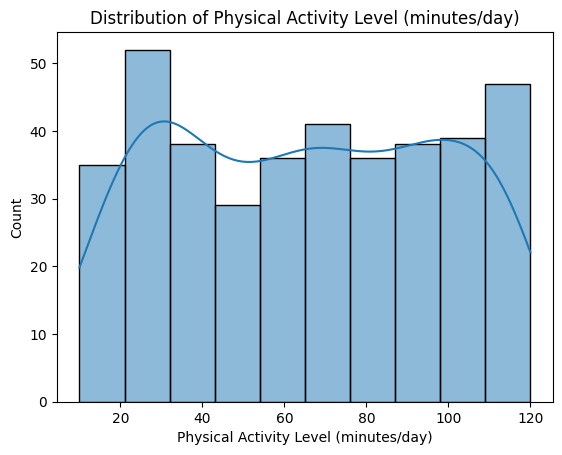

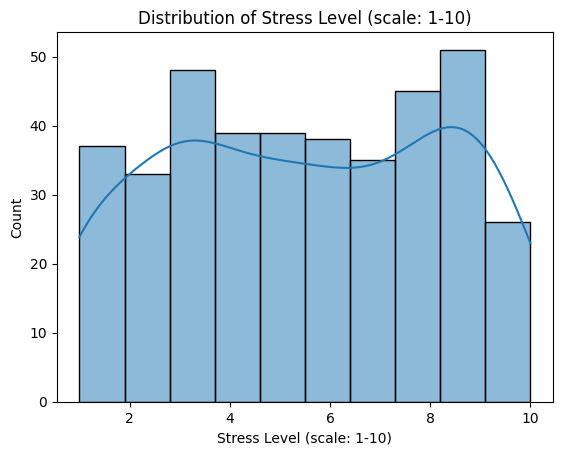

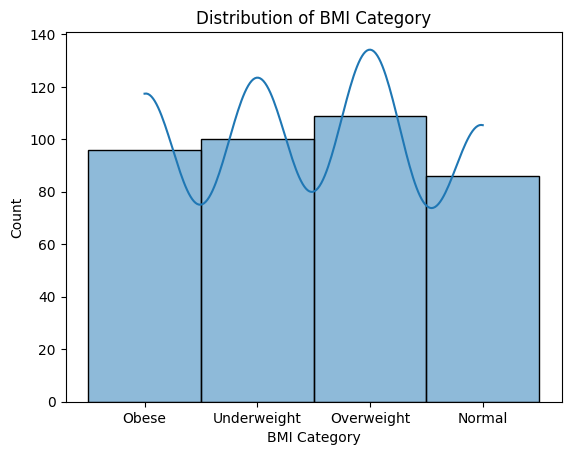

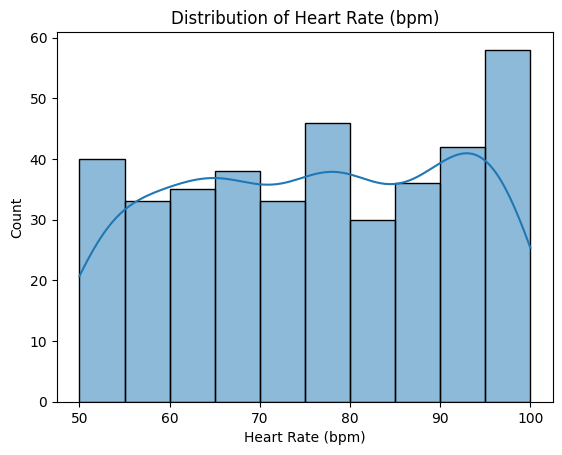

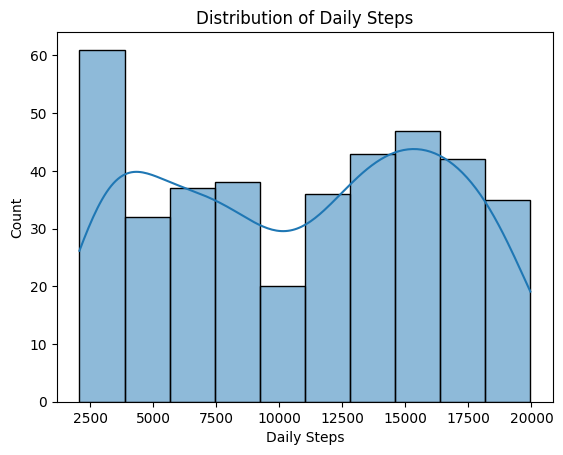

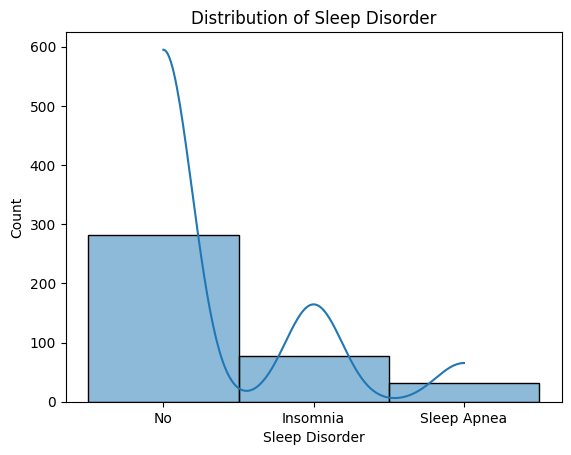

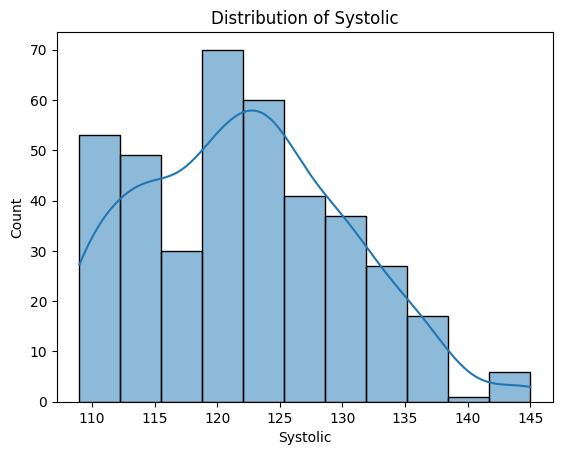

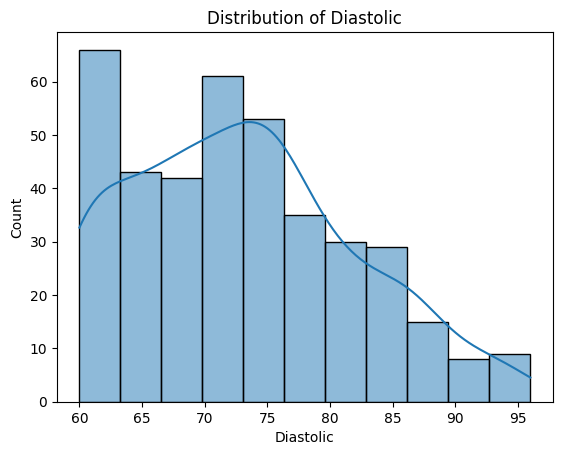

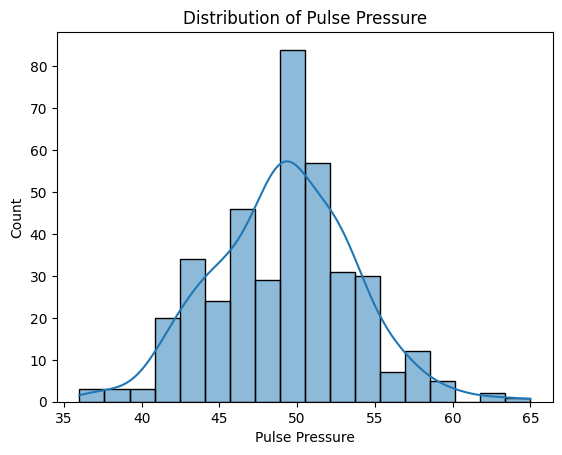

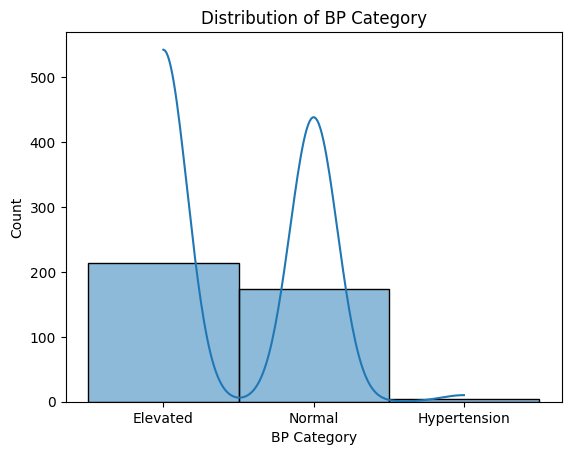

In [ ]:
numeric_cols=df1.loc[:, df1.columns != "Blood Pressure (systolic/diastolic)"]

for col in numeric_cols:
    sns.histplot(df1[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

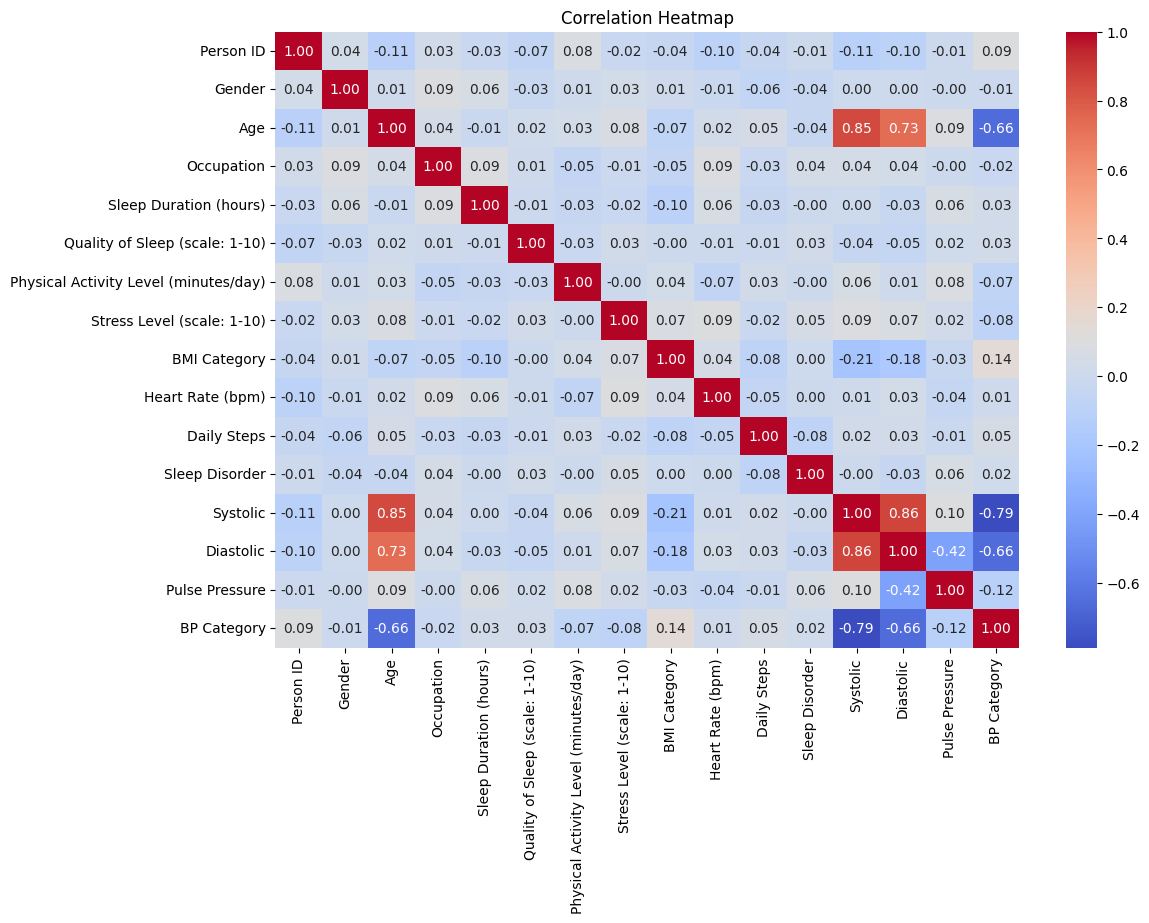

In [ ]:
# 1. Exploratory Data Analysis (EDA)
# Correlation heatmap
numeric_cols1 = df3.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols1.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


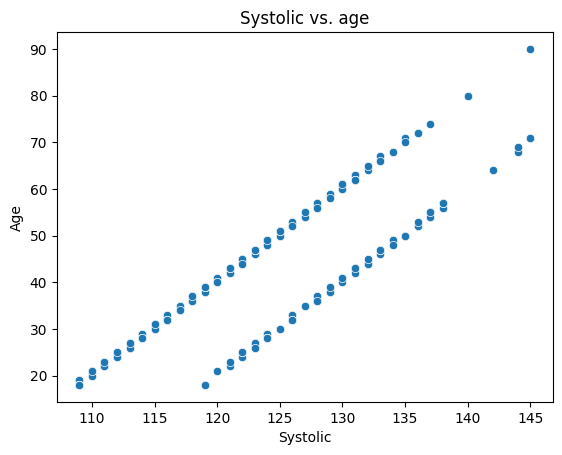

In [ ]:
# Scatter plot example: Sleep Duration vs. Stress Level
sns.scatterplot(x='Systolic', y='Age', data=df3 )
plt.title("Systolic vs. age")
plt.show()

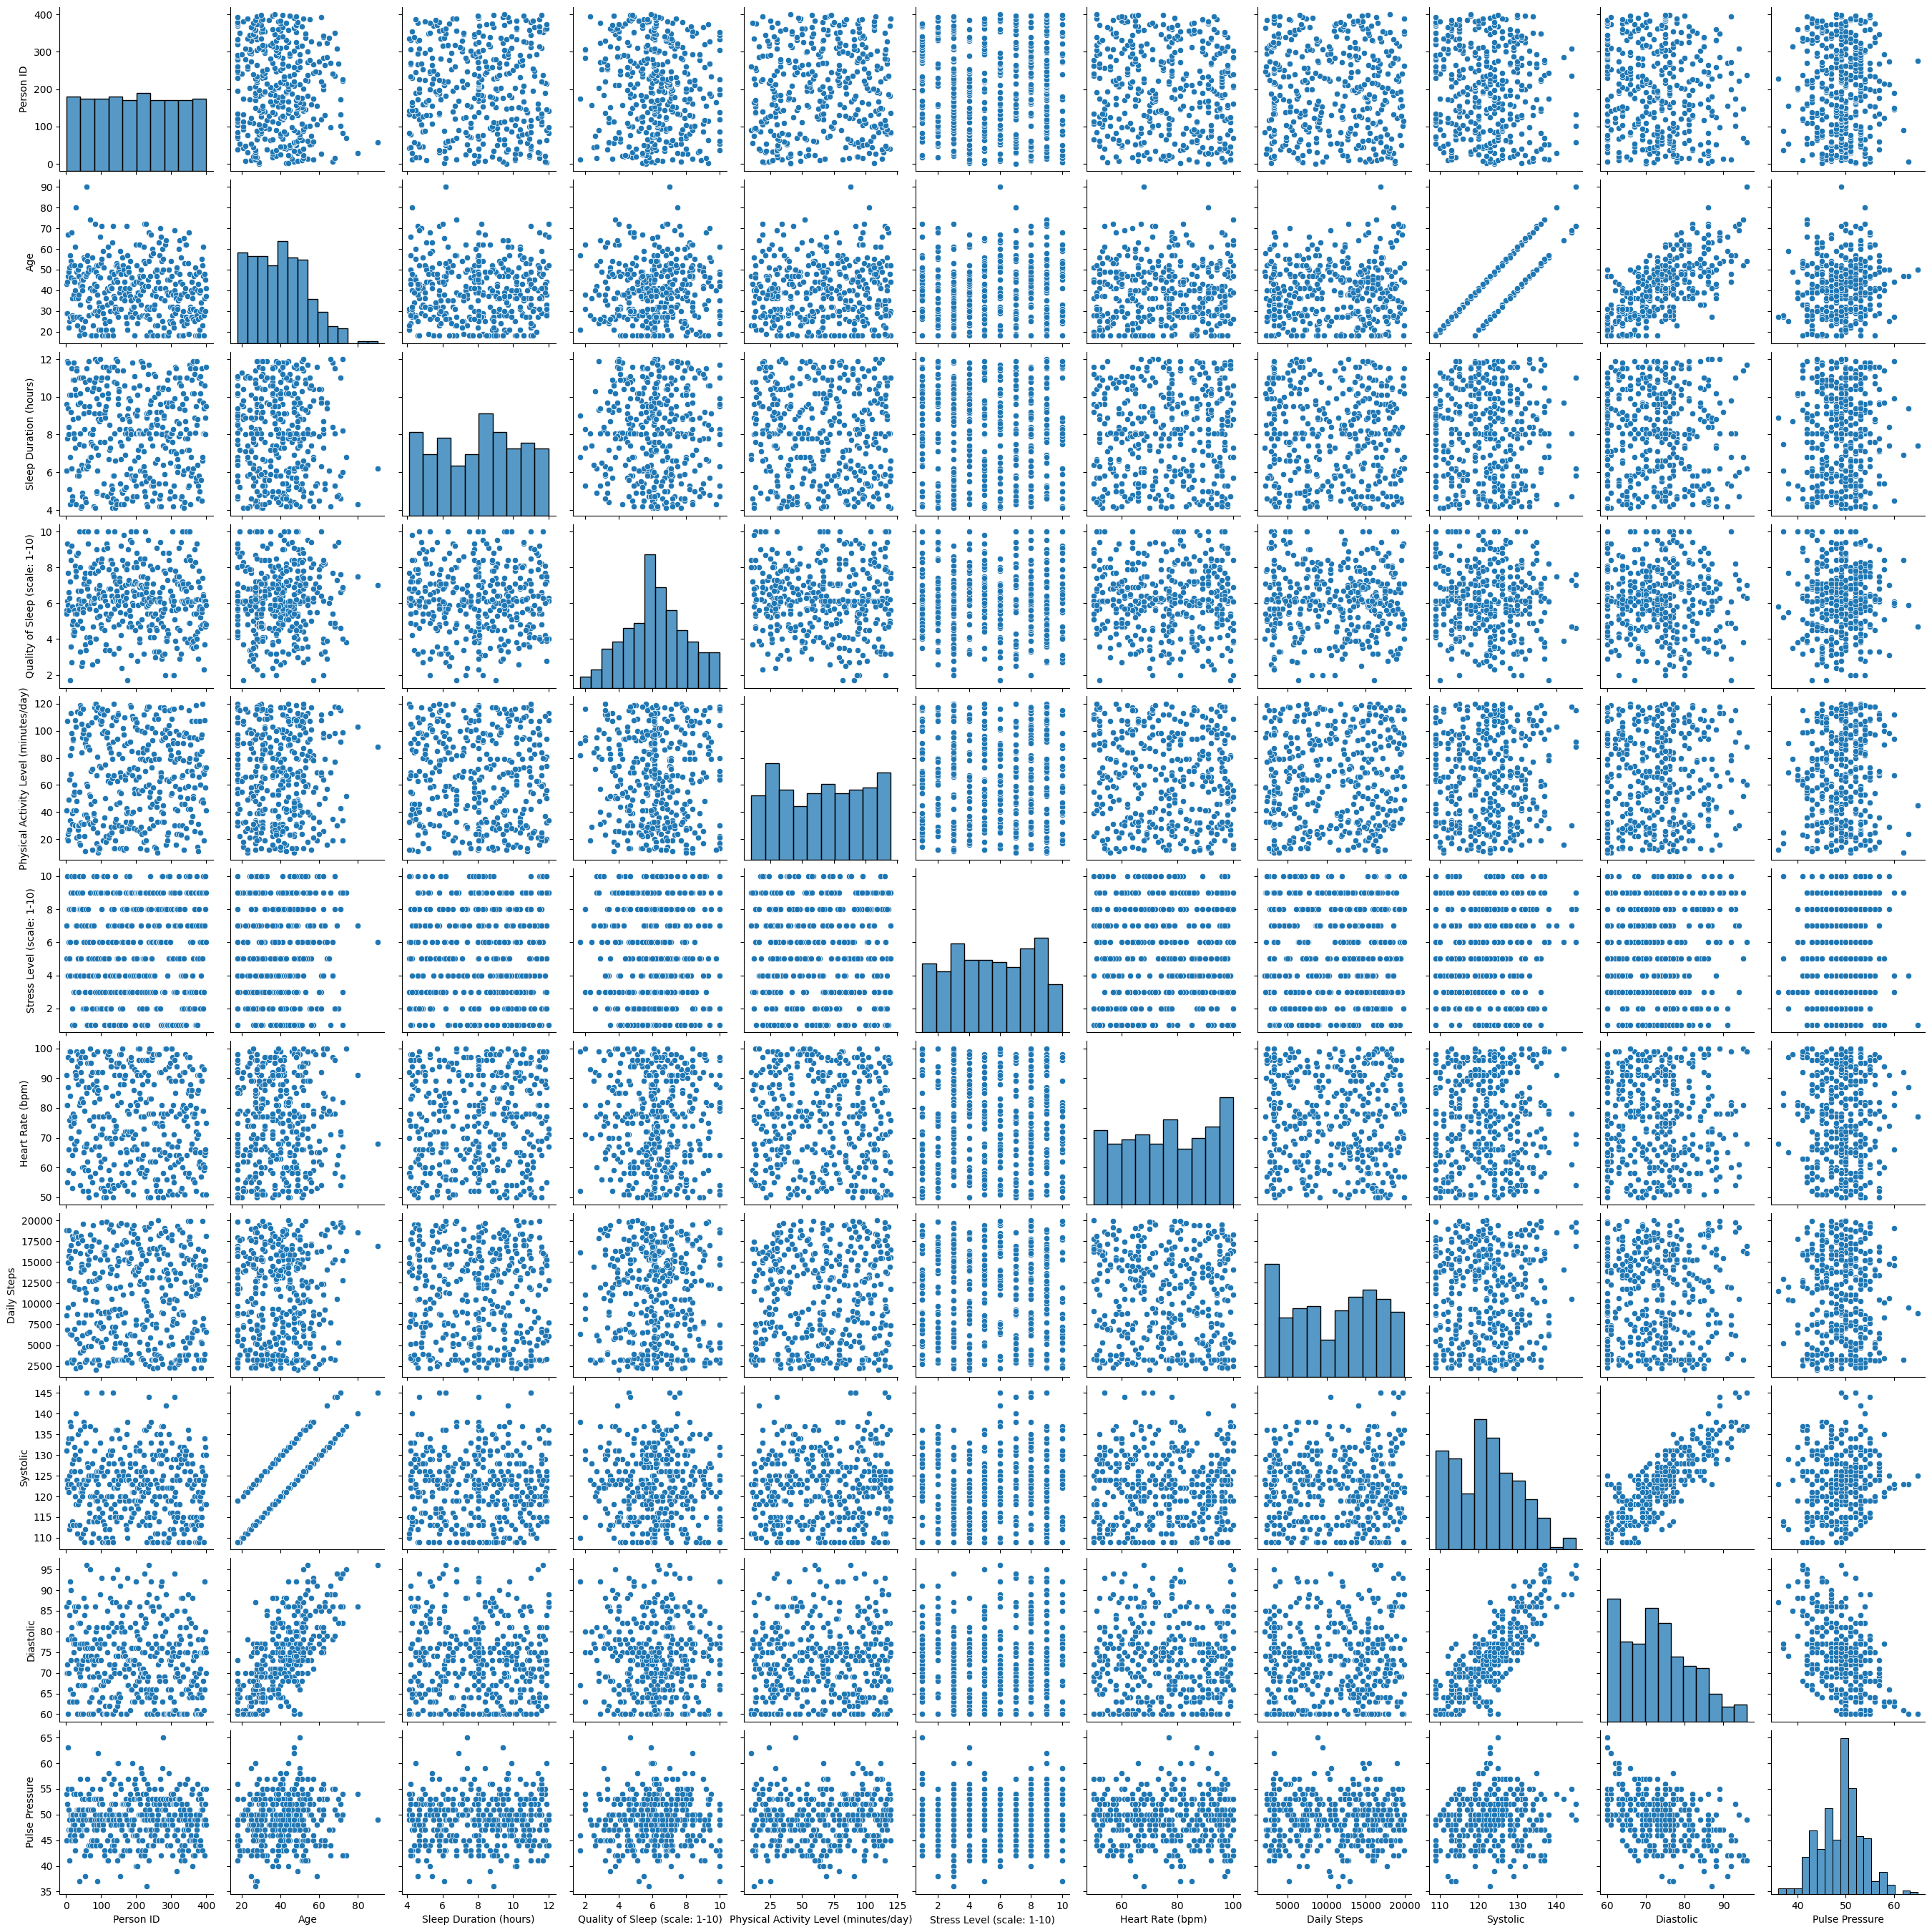

In [ ]:
sns.pairplot(numeric_cols)
plt.show()

In [ ]:
# 2. Data Aggregation and Filtering
# Group by Gender and compute mean Sleep Duration
agg_data = df1.groupby('Gender').agg({'Sleep Duration (hours)': 'mean'}).reset_index()
print("Mean Sleep Duration by Gender  :\n", agg_data)

Mean Sleep Duration by Gender  :
    Gender  Sleep Duration (hours)
0  Female                7.898252
1    Male                8.180599


In [ ]:
# Filter patients older than 50 and then find average stress levels by BP category
filtered_agg_mean = df1[df1['Age'] > 50].groupby('BP Category').agg({'Stress Level (scale: 1-10)': 'mean'}).reset_index()
print(filtered_agg_mean)





    BP Category  Stress Level (scale: 1-10)
0      Elevated                    5.961538
1  Hypertension                    8.000000


In [ ]:
#Group by Occupation and compute mean Sleep Duration,Stress Level ,Physical Activity Level
agg_data = df1.groupby(["Occupation"]).agg({
    "Sleep Duration (hours)": "mean",
    "Stress Level (scale: 1-10)": "mean",
    "Physical Activity Level (minutes/day)": "mean"
}).reset_index()

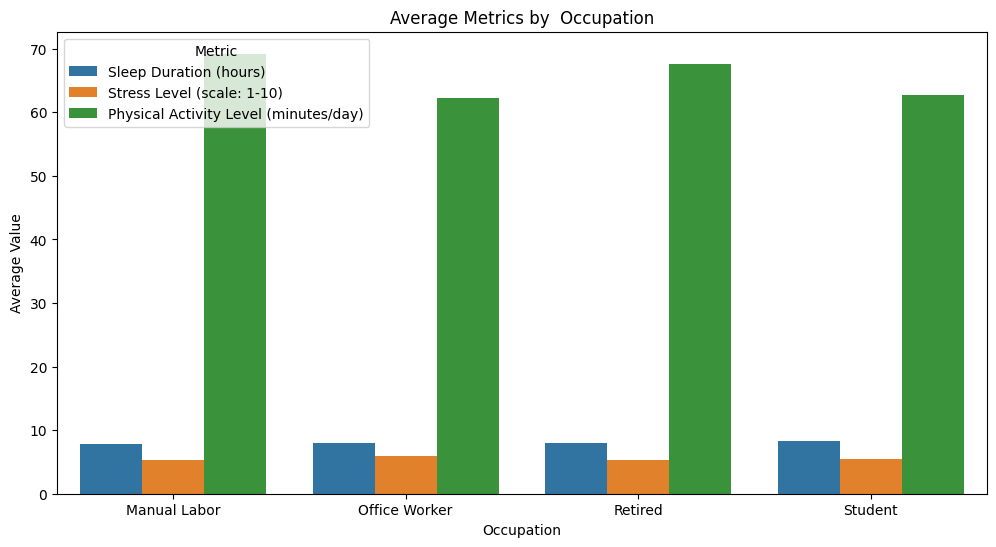

In [ ]:
# 3. Visualization of Aggregated Data
plt.figure(figsize=(12, 6))
sns.barplot(
    data=agg_data.melt(id_vars=["Occupation"],
                              var_name="Metric", #var_name="Metric": Creates a column called metric which contains the names of the aggregated metrics ( Sleep Duration (hours), Stress Level (scale: 1-10)).
                              value_name="Average Value"),
    x="Occupation", y="Average Value", hue="Metric"
)
plt.title("Average Metrics by  Occupation")
plt.xlabel("Occupation")
plt.ylabel("Average Value")
plt.legend(title="Metric")
plt.show()


<ipython-input-75-79bedefb198f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


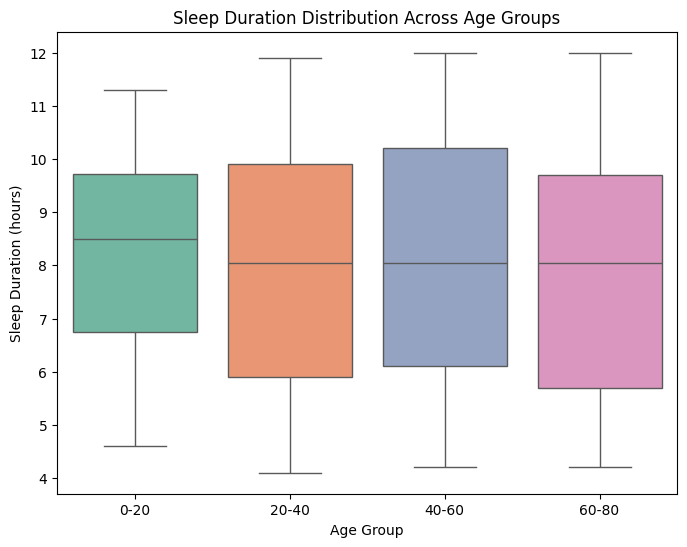

In [ ]:
# 6. Distribution of Sleep Duration by Age Groups
df3["Age Group"] = pd.cut(
    df3["Age"], bins=[0, 20, 40, 60, 80], labels=["0-20", "20-40", "40-60", "60-80"]
)
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df3,
    x="Age Group",
    y="Sleep Duration (hours)",
    palette="Set2"
)
plt.title("Sleep Duration Distribution Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Sleep Duration (hours)")
plt.show()

<ipython-input-74-2900799ebf21>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


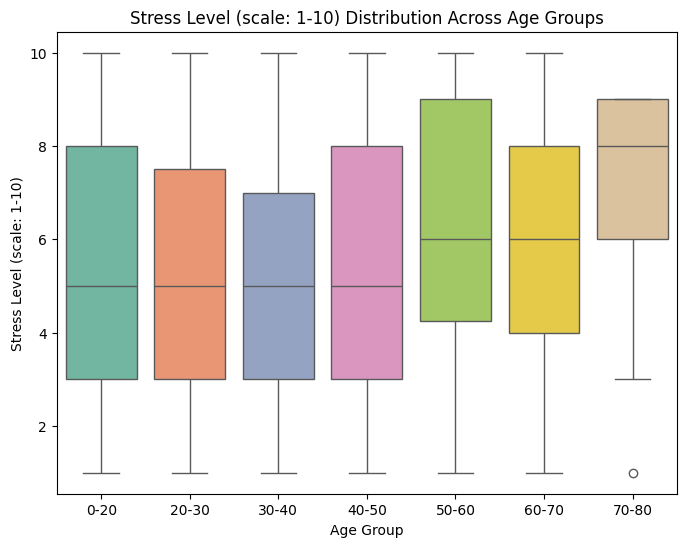

In [ ]:
# 6. Distribution of Stress by Age Groups
df3["Age Group"] = pd.cut(
    df3["Age"], bins=[0, 20, 30, 40, 50,60,70,80], labels=["0-20", "20-30", "30-40", "40-50","50-60","60-70","70-80"]
)
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df3,
    x="Age Group",
    y="Stress Level (scale: 1-10)",
    palette="Set2"
)
plt.title("Stress Level (scale: 1-10) Distribution Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Stress Level (scale: 1-10)")
plt.show()

Frequency of Sleep Disorders:
Sleep Disorder
No             282
Insomnia        78
Sleep Apnea     31
Name: count, dtype: int64


<ipython-input-100-7c12c12f978d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


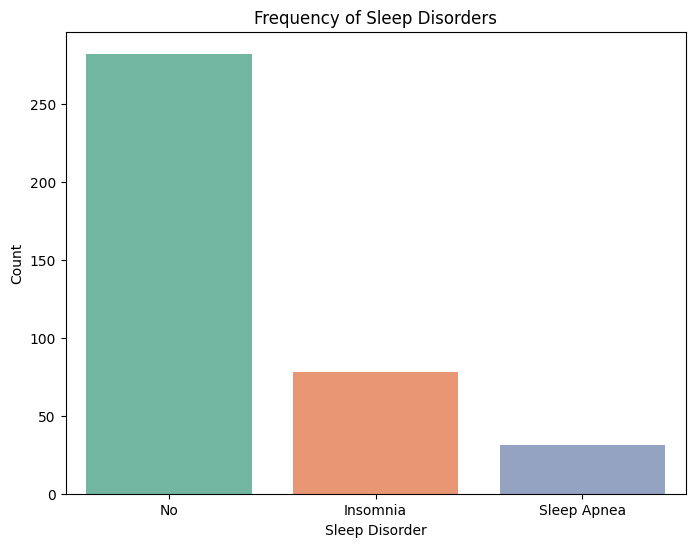

In [ ]:

sleep_disorder_column = 'Sleep Disorder'

# Frequency count of sleep disorders
count_dis = df1[sleep_disorder_column].value_counts()


print("Frequency of Sleep Disorders:")
print(count_dis)

# Bar plot of sleep disorder frequency
plt.figure(figsize=(8, 6))
sns.barplot(
    x=count_dis.index,
    y=count_dis.values,
    palette="Set2"
)
plt.title("Frequency of Sleep Disorders")
plt.xlabel("Sleep Disorder")
plt.ylabel("Count")

plt.show()



Average Metrics by Sleep Disorder Status:
  Sleep Disorder  Sleep Duration (hours)  Quality of Sleep (scale: 1-10)  \
0       Insomnia                8.133414                        6.131152   
1             No                7.991723                        6.199637   
2    Sleep Apnea                8.232326                        6.336967   

   Stress Level (scale: 1-10)  Physical Activity Level (minutes/day)  \
0                    5.294872                              60.166667   
1                    5.503546                              68.163121   
2                    5.967742                              51.967742   

   Heart Rate (bpm)   Daily Steps        Age  
0         75.794872  12095.192308  40.589744  
1         76.010638  10485.187943  39.709220  
2         75.645161  11256.548387  38.387097  


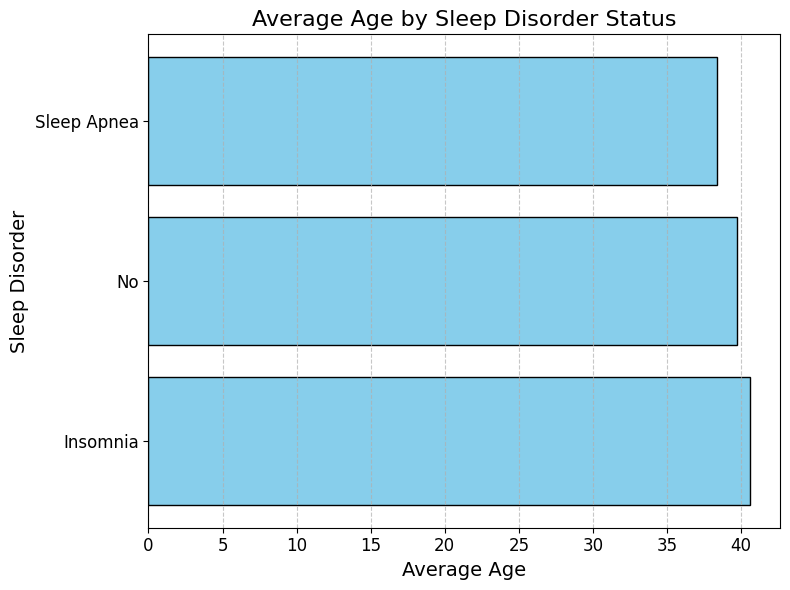

In [ ]:
# Calculate average metrics by Sleep Disorder status
dis_agg = df1.groupby("Sleep Disorder").agg({
    "Sleep Duration (hours)": "mean",
    "Quality of Sleep (scale: 1-10)": "mean",
    "Stress Level (scale: 1-10)": "mean",
    "Physical Activity Level (minutes/day)": "mean",
    "Heart Rate (bpm)": "mean",
    "Daily Steps": "mean",
    "Age": "mean"


}).reset_index()
print("Average Metrics by Sleep Disorder Status:")
print(dis_agg)
# Filter to visualize only the Age column
plt.figure(figsize=(8, 6))
plt.barh(dis_agg["Sleep Disorder"], dis_agg["Age"], color='skyblue', edgecolor='black')
plt.title('Average Age by Sleep Disorder Status', fontsize=16)
plt.xlabel('Average Age', fontsize=14)
plt.ylabel('Sleep Disorder', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Aggregated Blood Pressure Metrics by BP Category:
    BP Category Systolic                 Diastolic               
                     min  max       mean       min max       mean
0      Elevated      121  144  127.71028        60  96  78.116822
1  Hypertension      144  145  144.75000        93  96  94.000000
2        Normal      109  120  114.65896        60  79  66.132948


<ipython-input-130-a8db3761373a>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="BP Category", y="Systolic", data=df1, palette="viridis")
<ipython-input-130-a8db3761373a>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="BP Category", y="Diastolic", data=df1, palette="viridis")


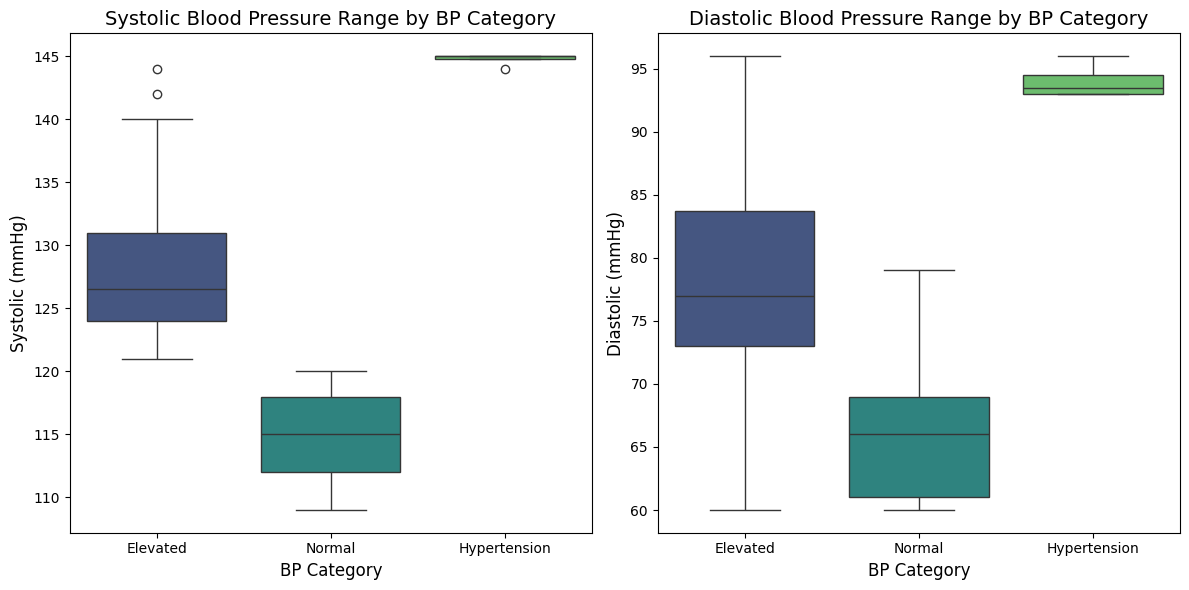

In [ ]:

# Aggregating systolic and diastolic blood pressure by BP category
bp_agg = df1.groupby("BP Category").agg({
    "Systolic": ["min", "max", "mean"],
    "Diastolic": ["min", "max", "mean"]
}).reset_index()

print("Aggregated Blood Pressure Metrics by BP Category:")
print(bp_agg)

# Visualizing the range of blood pressure using a box plot
plt.figure(figsize=(12, 6))

# Systolic Blood Pressure
plt.subplot(1, 2, 1) # it makes space between the two diagrams
sns.boxplot(x="BP Category", y="Systolic", data=df1, palette="viridis")
plt.title("Systolic Blood Pressure Range by BP Category", fontsize=14)
plt.xlabel("BP Category", fontsize=12)
plt.ylabel("Systolic (mmHg)", fontsize=12)


# Diastolic Blood Pressure
plt.subplot(1, 2, 2)
sns.boxplot(x="BP Category", y="Diastolic", data=df1, palette="viridis")
plt.title("Diastolic Blood Pressure Range by BP Category", fontsize=14)
plt.xlabel("BP Category", fontsize=12)
plt.ylabel("Diastolic (mmHg)", fontsize=12)


plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Columns to normalize
columns_to_normalize = ['Daily Steps', 'Sleep Duration (hours)',
                        'Physical Activity Level (minutes/day)', 'Heart Rate (bpm)']

scaler = MinMaxScaler()
df3_to_normalize[columns_to_normalize] = scaler.fit_transform(df3_to_normalize[columns_to_normalize])


In [ ]:
#save
df3_to_normalize.to_csv('sleepdata_normalized1.csv', index=False)

df4=pd.read_csv("/content/sleepdata_normalized1.csv")

***we made oversampling because the data is imbalanced , as you saw before the distribution of the sleep disorder class is not distributed well , the "No" class has the greatest frequancy,that it makes a huge difference between it and other classes ***


In [ ]:
#drop blood pressure
df4.drop('Blood Pressure (systolic/diastolic)', axis=1, inplace=True)
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
#  Handling Imbalanced Data
# Oversampling using SMOTE
X = df4.drop('Sleep Disorder', axis=1)  # Features
y = df4['Sleep Disorder']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(



Class Distribution After SMOTE:
Sleep Disorder
0    196
1    196
2    196
Name: count, dtype: int64


<ipython-input-143-299ded45d3ab>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=new_class_dist.index, y=new_class_dist.values, palette='viridis')


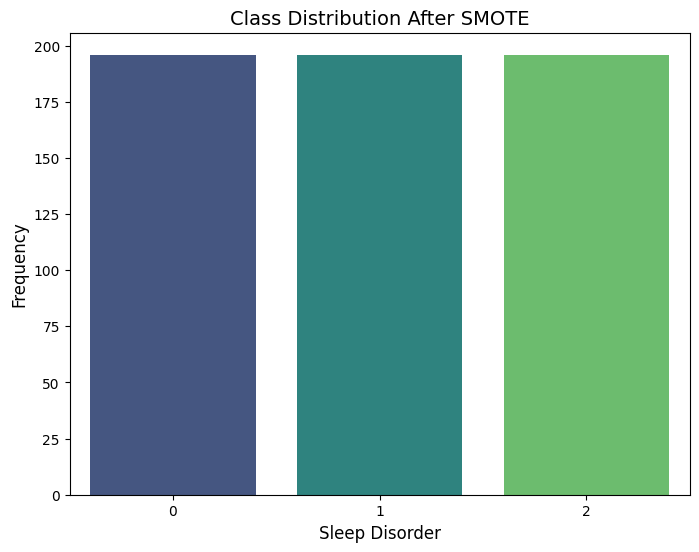

In [ ]:
# Visualize the distribution after SMOTE
new_class_dist = y_resampled.value_counts()

print("\nClass Distribution After SMOTE:")
print(new_class_dist)

# Initialize a new figure for the plot
plt.figure(figsize=(8, 6))

# Create a bar plot for the new class distribution
sns.barplot(x=new_class_dist.index, y=new_class_dist.values, palette='viridis')
plt.title('Class Distribution After SMOTE', fontsize=14)
plt.xlabel('Sleep Disorder', fontsize=12)
plt.ylabel('Frequency', fontsize=12)


plt.show()
